### Student Information
Name: 王又賢

Student ID: 111080602

GitHub ID: beck-wang

Kaggle name: beck_wang

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## First Part: take home exercises

In [ ]:
# %reset -f
import os
import str
import json
import nltk
import keras
import gensim
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')


from keras.callbacks import CSVLogger
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

os.chdir(r"c:\Users\Wang\SynologyDrive\datamining\Homework\homework2\master\\")

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
### training data
anger_train = pd.read_csv("anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine & shuffle 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df = train_df.sample(frac=1,random_state=168)
train_df.head()

,id,text,emotion,intensity
597,10597,Trumpism likewise rests on a bed of racial res...,anger,0.417
2660,30656,@hoemanda69 wtf is tenacious and jubilant,joy,0.312
3197,40370,@questlove when are people going to realize th...,sadness,0.500
2801,30797,half day tuhday but nah for glee 😭,joy,0.125
818,10818,@WWE is the live event Brock vs Orton 2 this S...,anger,0.208


In [ ]:
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

count_vect = CountVectorizer()
# Learn the vocabulary and return document-term matrix
train_df_counts = count_vect.fit_transform(train_df.text) 
print(f"shape: {train_df_counts.shape}")

# Create a DataFrame with word and counts
train_freq_df = pd.DataFrame({'word': count_vect.get_feature_names_out(), 
                             'count': train_df_counts.sum(axis=0).A1})

print("\n=== word frequency for Top 30 words in train dataset ===")
train_freq_df_sorted = train_freq_df.sort_values(by='count', ascending=False)
train_freq_df_sorted.head(30)

shape: (3613, 10115)

=== word frequency for Top 30 words in train dataset ===


,word,count
8930,the,1736
9119,to,1289
537,and,955
10051,you,796
6371,of,793
4546,is,787
4571,it,717
4383,in,626
8924,that,537
5957,my,535


In [ ]:
### testing data
anger_test = pd.read_csv("anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine & shuffle 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df = test_df.sample(frac=1,random_state=404)
test_df.head()

,id,text,emotion,intensity
300,40813,This shit hurting my heart 😪 that's how seriou...,sadness,0.875
195,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
283,40796,Public products: high downhearted price tag co...,sadness,0.354
299,40812,@StaceyDavidson_ You're a thief and a liberal ...,sadness,0.667
240,30869,Chris would take full responsibility and would...,joy,0.280


In [ ]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

count_vect = CountVectorizer()
# Learn the vocabulary and return document-term matrix
test_df_counts = count_vect.fit_transform(test_df.text) 
print(f"shape: {test_df_counts.shape}")

# Create a DataFrame with word and counts
test_freq_df = pd.DataFrame({'word': count_vect.get_feature_names_out(), 
                             'count': test_df_counts.sum(axis=0).A1})

print("\n=== word frequency for Top 30 words in test dataset ===")
test_freq_df_sorted = test_freq_df.sort_values(by='count', ascending=False)
test_freq_df_sorted.head(30)

shape: (347, 1949)

=== word frequency for Top 30 words in test dataset ===


,word,count
1687,the,153
1739,to,138
99,and,92
1240,of,83
909,it,83
1938,you,82
903,is,77
867,in,69
655,for,57
1686,that,55


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_1000.fit(train_df['text'])

train_tfidf_1000 = tfidf_1000.transform(train_df['text'])

feature_names = tfidf_1000.get_feature_names_out()
feature_names[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

=== Confusion table of DecisionTree model(with BOW_500) ===


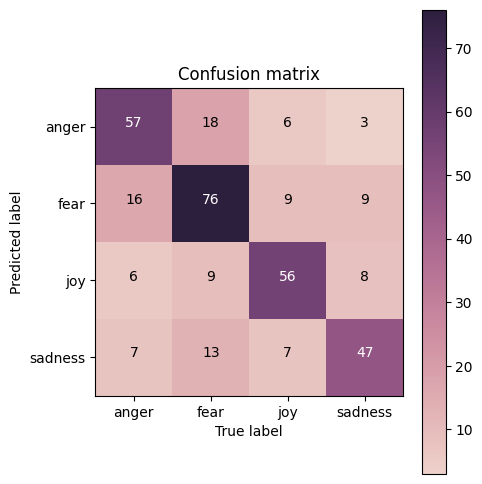

In [ ]:
# DecisionTree model(with BOW_500) 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

print("=== Confusion table of DecisionTree model(with BOW_500) ===")
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Can you interpret the results above? What do they mean?
- The blocks corresponding to the **"Pre_fear" to "True_anger"** & **"Pre_anger" to "True_fear"** both have high values, exceeding 10. This suggests that the model frequently misclassifies instances of sadness and anger, indicating confusion between these two emotions.
    
    &rArr; Here show a potential challenge in distinguishing between these two emotions, suggesting the need for cautious consideration when handling predictions related to them.

- Specifically, only the block of "Pre_sad" to "True_fear" has a notably higher value. This implies that the model is relatively more successful in correctly identifying instances of sadness within the context of fear, demonstrating a comparatively better ability to discern sadness from fear.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

=== Confusion table of Naive Bayes model(with BOW_500) ===


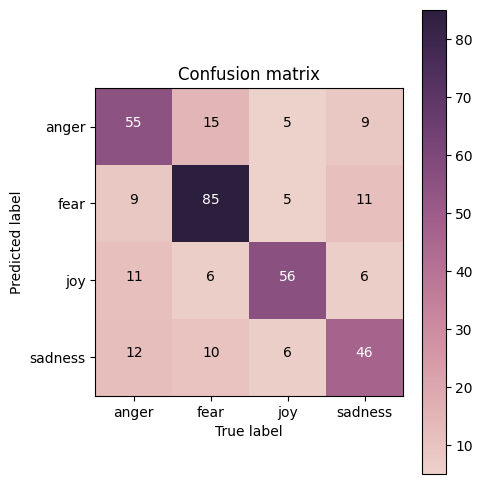

In [ ]:
# Naive Bayes model(with BOW_500)
from sklearn.naive_bayes import MultinomialNB

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


NB_model = MultinomialNB(force_alpha=True)
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

print("=== Confusion table of Naive Bayes model(with BOW_500) ===")
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

              precision    recall  f1-score   support

       anger       0.74      0.76      0.75        84
        fear       0.78      0.79      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.72      0.74      0.73        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347

=== Confusion table of Naive Bayes model(with BOW_1000) ===


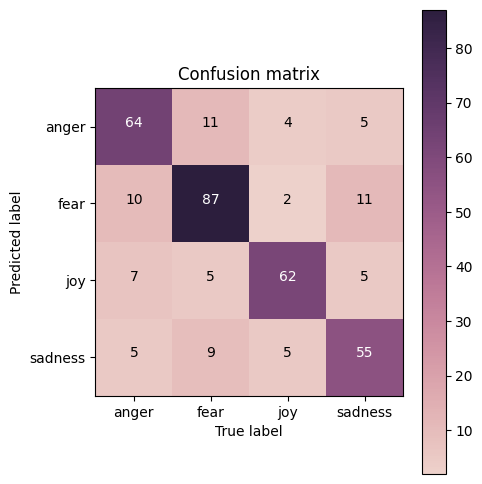

In [ ]:
# Naive Bayes model(with BOW_1000)
from sklearn.naive_bayes import MultinomialNB

BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
BOW_1000.fit(train_df['text'])

X_train = BOW_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_1000.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB(force_alpha=True)
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

print("=== Confusion table of Naive Bayes model(with BOW_1000) ===")
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

              precision    recall  f1-score   support

       anger       0.85      0.71      0.77        84
        fear       0.66      0.92      0.77       110
         joy       0.86      0.75      0.80        79
     sadness       0.85      0.61      0.71        74

    accuracy                           0.76       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.76      0.76       347

=== Confusion table of Naive Bayes model(with tfidf_1000) ===


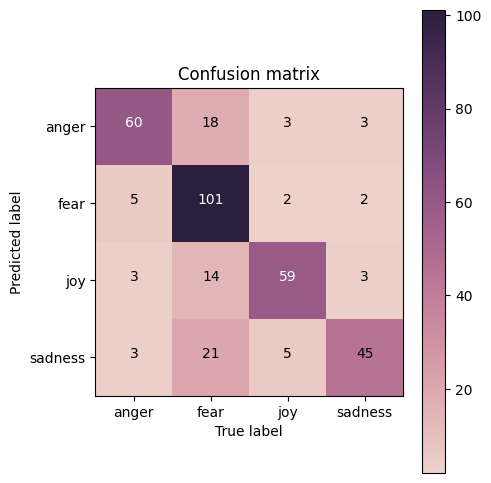

In [ ]:
# Naive Bayes model(with BOW_1000)
from sklearn.naive_bayes import MultinomialNB

X_train = tfidf_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = tfidf_1000.transform(test_df['text'])
y_test = test_df['emotion']


NB_model = MultinomialNB(force_alpha=True)
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(classification_report(y_true=y_test, y_pred=y_test_pred))

print("=== Confusion table of Naive Bayes model(with tfidf_1000) ===")
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Score
| Model (Features) | Accuracy | Precision (anger, fear, joy, sadness) | Recall (anger, fear, joy, sadness) | F1-Score (anger, fear, joy, sadness) |
| --- | -------- | -------------------------------------- | ---------------------------------- | ------------------------------------ |
| Decision Tree (BOW_500)               | 68%      | 0.66, 0.66, 0.72, 0.70 | 0.68, 0.69, 0.71, 0.64 | 0.67, 0.67, 0.71, 0.67 |
| Naive Bayes (BOW_500)                 | 70%      | 0.63, 0.73, 0.78, 0.64 | 0.65, 0.77, 0.71, 0.62 | 0.64, 0.75, 0.74, 0.63 |
| Naive Bayes (BOW_1000)                | 77%      | 0.74, 0.78, 0.85, 0.72 | 0.76, 0.79, 0.78, 0.74 | 0.75, 0.78, 0.82, 0.73 |
| Naive Bayes (tfidf_1000)              | 76%      | 0.85, 0.66, 0.86, 0.85 | 0.71, 0.92, 0.75, 0.61 | 0.77, 0.77, 0.80, 0.71 |

### Summary

In a nutshell, the Naive Bayes model with BOW_1000 features stands out with approximately **77%** accuracy. The tfidf features don't to enhance the model's ability very more. _**The Decision Tree and Naive Bayes models**_ with different features are _**close in performance**_, with slight variations in different emotion categories.

### Interpretation of result
1. Model Complexity:
    - Decision Tree vs. Naive Bayes Models:
        - Decision Tree models are relatively simple and may struggle with complex relationships in the data, potentially leading to poorer performance.
        - Naive Bayes models, despite assuming independence between features (which may not hold true in reality), demonstrate _**better**_ performance in this exercise.

2. Feature Representation:

    - BOW_500 vs. BOW_1000:
        - The number of features significantly influences model performance, with BOW_1000(77%) outperforming BOW_500(70%).
    - BOW_1000 vs. tfidf_1000:
        - This result actully shock me become bag-of-words(76%) perform better than TF-IDF(76%). This suggests that, in this case the choice of feature representation do not plays a crucial role in determining model performance.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

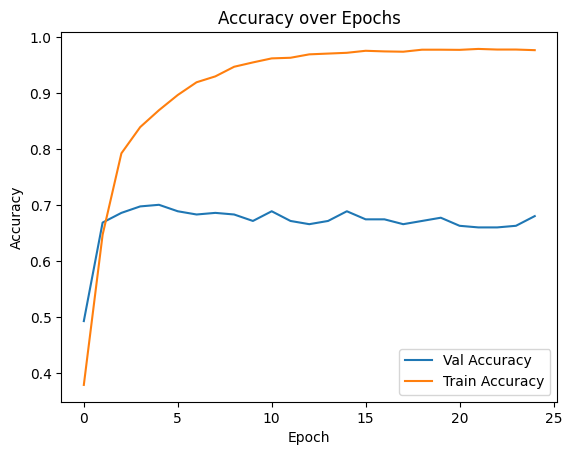

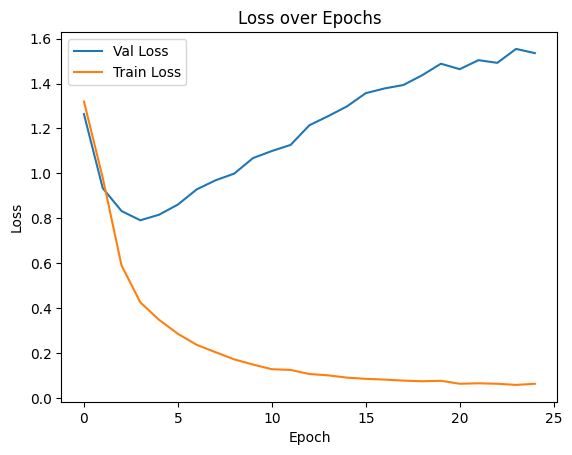

In [ ]:
log_df = pd.read_csv("training_log.csv")
acc_df = log_df.iloc[:,[0, 1, 3]]
loss_df = log_df.iloc[:,[0, 2, 4]]

sns.lineplot(data=acc_df, x="epoch", y="val_accuracy", label="Val Accuracy")
sns.lineplot(data=acc_df, x="epoch", y="accuracy", label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()


sns.lineplot(data=loss_df, x="epoch", y="val_loss", label="Val Loss")
sns.lineplot(data=loss_df, x="epoch", y="loss", label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()

- **Accuracy**: We can see the train accuracy is **consistently improving** and getting high accuracy while the validation accuracy plateaus or decreases, it might be a sign of overfitting.

- **Loss**: Similar to accuracy, the training loss is **consistently decreasing** while the validation loss plateaus or increases, it may also suggest overfitting.

- **Summary**: It will be good that we choise 2~4 epochs as our model, before 2 epochs represent the underfitting, after the 4 epochs represent the overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

# Second Part: Report of Kaggle Competition

---

In [27]:
# %reset -f
import os
import str
import json
import nltk
import keras
import numpy as np
import pandas as pd

from keras.callbacks import CSVLogger
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

os.chdir(r"c:\Users\Wang\SynologyDrive\datamining\Homework\homework2\tweets\\")

label = ["anger", "anticipation", "disgust", "fear", "sadness", "surprise", "trust", "joy"]

In [38]:
tweet_df = pd.DataFrame(columns=["tweet_id","score","index","hashtag","text","crawldate"])
#tweet_df = pd.DataFrame(columns=["tweet_id","score","text"])
data_list = []

with open("tweets_DM.json", "r") as json_file:
    for line in json_file:
        json_dict = json.loads(line)
        data_list.append({
        "tweet_id":json_dict["_source"]["tweet"]["tweet_id"],
        "score":json_dict["_score"],
        "index":json_dict["_index"],
        "hashtag":json_dict["_source"]["tweet"]["hashtags"],
        "text":json_dict["_source"]["tweet"]["text"],
        "crawldate":json_dict["_crawldate"]
        })

tweet_df = pd.DataFrame(data_list)
tweet_df.to_pickle("tweets_dataframe.pkl")

In [3]:
df = pd.read_pickle("tweets_dataframe.pkl")
df

,tweet_id,score,index,hashtag,text,crawldate
0,0x376b20,391,hashtag_tweets,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47
1,0x2d5350,433,hashtag_tweets,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",2016-01-28 04:52:09
2,0x28b412,232,hashtag_tweets,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20
3,0x1cd5b0,376,hashtag_tweets,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,2016-01-24 23:53:05
4,0x2de201,989,hashtag_tweets,[],"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59
...,...,...,...,...,...,...
1867530,0x316b80,827,hashtag_tweets,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12 12:51:52
1867531,0x29d0cb,368,hashtag_tweets,[],I swear all this hard work gone pay off one da...,2017-10-02 17:54:04
1867532,0x2a6a4f,498,hashtag_tweets,[],@Parcel2Go no card left when I wasn't in so I ...,2016-10-10 11:04:32
1867533,0x24faed,840,hashtag_tweets,[],"Ah, corporate life, where you can date <LH> us...",2016-09-02 14:25:06


In [4]:
df_pre = df.replace({"text":"<LH>"},{"text":""},regex=True)
df_pre = df_pre.replace({"text":r"@[^ ]+"},{"text":""},regex=True)

In [5]:
df_pre

,tweet_id,score,index,hashtag,text,crawldate
0,0x376b20,391,hashtag_tweets,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47
1,0x2d5350,433,hashtag_tweets,"[freepress, TrumpLegacy, CNN]","As we see, Trump is dangerous to #freepress a...",2016-01-28 04:52:09
2,0x28b412,232,hashtag_tweets,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20
3,0x1cd5b0,376,hashtag_tweets,[],Now ISSA is stalking Tasha 😂😂😂,2016-01-24 23:53:05
4,0x2de201,989,hashtag_tweets,[],"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59
...,...,...,...,...,...,...
1867530,0x316b80,827,hashtag_tweets,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12 12:51:52
1867531,0x29d0cb,368,hashtag_tweets,[],I swear all this hard work gone pay off one da...,2017-10-02 17:54:04
1867532,0x2a6a4f,498,hashtag_tweets,[],no card left when I wasn't in so I have no id...,2016-10-10 11:04:32
1867533,0x24faed,840,hashtag_tweets,[],"Ah, corporate life, where you can date using ...",2016-09-02 14:25:06


In [6]:
iden_df = pd.read_csv("data_identification.csv")
iden_df
answer_df = pd.read_csv("emotion.csv")
answer_df

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [7]:
merged_df = pd.merge(df_pre, iden_df, on="tweet_id")

In [8]:
train_df = merged_df[merged_df["identification"]=="train"]
test_df = merged_df[merged_df["identification"]=="test"]
tweet_max_length = merged_df['text'].apply(len).max()
tweet_max_length

248

In [9]:
train_df = pd.merge(train_df, answer_df, on="tweet_id")
train_df["text"]

0          People who post "add me on #Snapchat" must be ...
1           As we see, Trump is dangerous to #freepress a...
2                            Now ISSA is stalking Tasha 😂😂😂 
3            Thx for the BEST TIME tonight. What stories!...
4                   Still waiting on those supplies Liscus. 
                                 ...                        
1455558    I'm SO HAPPY!!! #NoWonder the name of this sho...
1455559    In every circumtance I'd like to be thankful t...
1455560    there's currently two girls walking around the...
1455561    Ah, corporate life, where you can date  using ...
1455562                   Blessed to be living #Sundayvibes 
Name: text, Length: 1455563, dtype: object

In [10]:
np.random.seed(50)
valid_df = train_df.sample(frac=0.1)
sampled_train_df = train_df.drop(valid_df.index)

In [11]:
sampled_train_df

,tweet_id,score,index,hashtag,text,crawldate,identification,emotion
0,0x376b20,391,hashtag_tweets,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",2015-05-23 11:42:47,train,anticipation
1,0x2d5350,433,hashtag_tweets,"[freepress, TrumpLegacy, CNN]","As we see, Trump is dangerous to #freepress a...",2016-01-28 04:52:09,train,sadness
2,0x1cd5b0,376,hashtag_tweets,[],Now ISSA is stalking Tasha 😂😂😂,2016-01-24 23:53:05,train,fear
3,0x1d755c,120,hashtag_tweets,"[authentic, LaughOutLoud]",Thx for the BEST TIME tonight. What stories!...,2015-06-11 04:44:05,train,joy
6,0x249c0c,827,hashtag_tweets,[LeagueCup],More highlights are being shown than actual ...,2016-04-18 13:01:02,train,sadness
...,...,...,...,...,...,...,...,...
1455558,0x321566,94,hashtag_tweets,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,2016-12-26 02:44:07,train,joy
1455559,0x38959e,627,hashtag_tweets,[],In every circumtance I'd like to be thankful t...,2015-04-01 08:14:56,train,joy
1455560,0x2cbca6,274,hashtag_tweets,[blessyou],there's currently two girls walking around the...,2016-11-17 23:46:22,train,joy
1455561,0x24faed,840,hashtag_tweets,[],"Ah, corporate life, where you can date using ...",2016-09-02 14:25:06,train,joy


In [13]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=700, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

#train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
#train_data_BOW_features_500.shape

CountVectorizer(max_features=700,
                tokenizer=<function word_tokenize at 0x0000025391591120>)

In [14]:
# standardize name (X, y)
X_train = BOW_500.transform(sampled_train_df['text'])
y_train = sampled_train_df['emotion']

X_valid = BOW_500.transform(valid_df['text'])
y_valid = valid_df['emotion']

In [15]:
## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)

X_train.shape:  (1310007, 700)
y_train.shape:  (1310007,)
X_valid.shape:  (145556, 700)
y_valid.shape:  (145556,)


In [16]:
## deal with label (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

print('\n\n## After convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:8]:
 0     anticipation
1          sadness
2             fear
3              joy
6          sadness
7     anticipation
9            anger
10             joy
Name: emotion, dtype: object

y_train.shape:  (1310007,)
y_valid.shape:  (145556,)


## After convert
y_train[0:8]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1310007, 8)
y_valid.shape:  (145556, 8)


In [17]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  700
output_shape:  8


In [18]:
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 700)]             0         
                                                                 
 dense (Dense)               (None, 64)                44864     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0     

In [19]:
csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 5
batch_size = 16

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_valid, y_valid))
print('training finish')

Epoch 1/5


c:\Users\Wang\.conda\envs\datamining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


81876/81876 [==============================] - 120s 1ms/step - loss: 1.4300 - accuracy: 0.4784 - val_loss: 1.4029 - val_accuracy: 0.4888
Epoch 2/5
81876/81876 [==============================] - 124s 1ms/step - loss: 1.3929 - accuracy: 0.4922 - val_loss: 1.3937 - val_accuracy: 0.4924
Epoch 3/5
81876/81876 [==============================] - 129s 2ms/step - loss: 1.3831 - accuracy: 0.4966 - val_loss: 1.3912 - val_accuracy: 0.4937
Epoch 4/5
81876/81876 [==============================] - 141s 2ms/step - loss: 1.3784 - accuracy: 0.4988 - val_loss: 1.3917 - val_accuracy: 0.4940
Epoch 5/5
81876/81876 [==============================] - 144s 2ms/step - loss: 1.3746 - accuracy: 0.5004 - val_loss: 1.3917 - val_accuracy: 0.4942
training finish


In [20]:
## predict
X_test = BOW_500.transform(test_df["text"])
print(X_test.shape)
pred_result = model.predict(X_test)
pred_result[:5]

(411972, 700)
12875/12875 [==============================] - 13s 967us/step


array([[8.1461491e-03, 5.4569894e-01, 1.5552659e-02, 1.6919989e-02,
        2.4562092e-01, 3.1941745e-02, 4.9254438e-03, 1.3119410e-01],
       [1.8327028e-04, 8.1093049e-01, 9.6676726e-05, 5.0406228e-03,
        1.6501091e-02, 6.4302149e-04, 2.1952399e-05, 1.6658282e-01],
       [2.9279251e-02, 1.2067912e-01, 2.2795878e-01, 8.3569437e-03,
        8.7186113e-02, 4.5178416e-01, 3.0165562e-02, 4.4590037e-02],
       [7.7256473e-04, 1.2697464e-01, 4.4829454e-03, 1.1708947e-03,
        6.7898387e-01, 1.2356414e-02, 2.2760252e-03, 1.7298265e-01],
       [1.2284810e-02, 5.8074969e-01, 4.1913539e-02, 2.1313954e-02,
        1.1113514e-01, 5.0625864e-02, 4.5363302e-03, 1.7744054e-01]],
      dtype=float32)

In [21]:
pred_emo = label_decode(label_encoder, pred_result)
print(len(pred_emo))
pred_emo[:5]

411972


array(['anticipation', 'anticipation', 'sadness', 'joy', 'anticipation'],
      dtype=object)

In [22]:
pred_emo.shape

(411972,)

In [23]:
test_df

,tweet_id,score,index,hashtag,text,crawldate,identification
2,0x28b412,232,hashtag_tweets,[bibleverse],"Confident of your obedience, I write to you, k...",2017-12-25 04:39:20,test
4,0x2de201,989,hashtag_tweets,[],"""Trust is not the same as faith. A friend is s...",2016-01-08 17:18:59,test
9,0x218443,66,hashtag_tweets,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,2015-09-09 09:22:55,test
30,0x2939d5,104,hashtag_tweets,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",2015-10-10 14:33:26,test
33,0x26289a,310,hashtag_tweets,[],"In these tough times, who do YOU turn to as yo...",2016-10-23 08:49:50,test
...,...,...,...,...,...,...,...
1867525,0x2913b4,602,hashtag_tweets,[],"""For this is the message that ye heard from th...",2016-12-10 18:01:00,test
1867529,0x2a980e,598,hashtag_tweets,[],"""There is a lad here, which hath five barley l...",2015-01-04 14:40:55,test
1867530,0x316b80,827,hashtag_tweets,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,2015-05-12 12:51:52,test
1867531,0x29d0cb,368,hashtag_tweets,[],I swear all this hard work gone pay off one da...,2017-10-02 17:54:04,test


In [24]:
test_df_id = pd.DataFrame(test_df["tweet_id"].copy().reset_index())
test_df_id = test_df_id.drop("index",axis=1)
test_df_id.columns = ["id"]
emo_df = pd.DataFrame(pred_emo, columns=["emotion"])

merged_output_df = pd.concat([test_df_id, emo_df], axis=1)
merged_output_df.to_csv("prediction_test.csv", index=False)
merged_output_df


,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,sadness
3,0x2939d5,joy
4,0x26289a,anticipation
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


In [61]:
pred_df = pd.read_csv("predction.csv")
pred_df

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,sadness
3,0x2939d5,joy
4,0x26289a,anticipation
...,...,...
410457,0x2913b4,joy
410458,0x2a980e,anticipation
410459,0x316b80,disgust
410460,0x29d0cb,joy


In [25]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_valid), pred_result), 2)))

ValueError: Found input variables with inconsistent numbers of samples: [145556, 411972]

In [26]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.478394,1.430025,0.488843,1.402862
1,1,0.492154,1.392908,0.492353,1.393732
2,2,0.496591,1.383094,0.493666,1.391162
3,3,0.498825,1.378413,0.493989,1.391661
4,4,0.500429,1.374649,0.494208,1.391732
